In [1]:

#pandas
import pandas as pd
from pandas import Series,DataFrame

#numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
import math
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,accuracy_score,mean_squared_log_error
from sklearn.metrics import roc_curve, auc,roc_auc_score,mean_squared_error
import xgboost as xgb
from numpy.linalg import inv
from xgboost.sklearn import XGBClassifier,XGBRegressor
from sklearn.kernel_ridge import KernelRidge
import matplotlib.dates
import operator

C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train = pd.read_csv("transform_train.csv")
test = pd.read_csv("transform_test.csv")

In [3]:
train_cluster = pd.read_csv("train_composition_final_cluster.csv")
test_cluter = pd.read_csv("test_composition_final_cluster.csv")

In [4]:
train.tail()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,...,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev,Al_Ga,Al_In,Ga_In,AlGaIn_O,n_atom_al,n_atom_ga,n_atom_in
2395,2396,33,40.0,0.7500,0.2500,0.0000,4,8,9,90,...,90,0.0381,3.7349,8,7,15,3,30,10,0
2396,2397,167,30.0,0.4167,0.5833,0.0000,4,4,13,89,...,120,0.0670,3.4915,2,9,6,2,12,17,0
2397,2398,206,80.0,0.4375,0.5625,0.0000,9,9,9,90,...,89,0.0906,3.2750,1,7,6,2,35,45,0
2398,2399,33,80.0,0.3125,0.1875,0.5000,10,9,9,90,...,90,0.2566,1.3915,5,4,10,7,25,15,40
2399,2400,206,80.0,0.8750,0.0938,0.0312,9,9,9,90,...,89,0.1135,4.2107,43,64,22,38,70,7,2


In [5]:
train_cluster.tail()

,composition,final_cluster
2395,2396,9
2396,2397,9
2397,2398,9
2398,2399,9
2399,2400,9


In [6]:
def label_spacegroup(df):
    sr = pd.Series(df['spacegroup'])
    t= pd.get_dummies(sr)
    df['t12'] = t[12]
    df['t33'] = t[33]
    df['t167'] = t[167]
    df['t194'] = t[194]
    df['t206'] = t[206]
    df['t227'] = t[227]
    return df


In [7]:
def label_final_cluster(df):
    sr = pd.Series(df['final_cluster'])
    t= pd.get_dummies(sr)
    df['c0'] = t[0]
    df['c1'] = t[1]
    df['c2'] = t[2]
    df['c3'] = t[3]
    df['c4'] = t[4]
    df['c5'] = t[5]
    df['c6'] = t[6]
    df['c7'] = t[7]
    df['c8'] = t[8]
    df['c9'] = t[9]
    return df


In [8]:
#sr = pd.Series(train['final_cluster'])
#t= pd.get_dummies(sr)
#t

In [9]:
train = label_spacegroup(train)
test = label_spacegroup(test)

In [10]:
train.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,...,AlGaIn_O,n_atom_al,n_atom_ga,n_atom_in,t12,t33,t167,t194,t206,t227
0,1,33,80.0,0.6250,0.3750,0.000,9,8,9,90,...,3,50,30,0,0,1,0,0,0,0
1,2,194,80.0,0.6250,0.3750,0.000,6,6,23,90,...,4,50,30,0,0,0,0,1,0,0
2,3,227,40.0,0.8125,0.1875,0.000,9,5,13,90,...,1,32,7,0,0,0,0,0,0,1
3,4,167,30.0,0.7500,0.0000,0.250,5,5,13,89,...,2,22,0,7,0,0,1,0,0,0
4,5,194,80.0,0.0000,0.6250,0.375,6,6,24,89,...,0,0,50,30,0,0,0,1,0,0


In [11]:
train = pd.merge(train,train_cluster,how='left',left_on='id',right_on='composition')

In [12]:
test = pd.merge(test,test_cluter,how='left',left_on='id',right_on='composition')

In [13]:
train.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,...,n_atom_ga,n_atom_in,t12,t33,t167,t194,t206,t227,composition,final_cluster
0,1,33,80.0,0.6250,0.3750,0.000,9,8,9,90,...,30,0,0,1,0,0,0,0,1,8
1,2,194,80.0,0.6250,0.3750,0.000,6,6,23,90,...,30,0,0,0,0,1,0,0,2,8
2,3,227,40.0,0.8125,0.1875,0.000,9,5,13,90,...,7,0,0,0,0,0,0,1,3,8
3,4,167,30.0,0.7500,0.0000,0.250,5,5,13,89,...,0,7,0,0,1,0,0,0,4,8
4,5,194,80.0,0.0000,0.6250,0.375,6,6,24,89,...,50,30,0,0,0,1,0,0,5,8


In [14]:
#train = label_final_cluster(train)
#test = label_final_cluster(test)

In [15]:
train.columns

Index(['id', 'spacegroup', 'number_of_total_atoms', 'percent_atom_al',
       'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'formation_energy_ev_natom',
       'bandgap_energy_ev', 'Al_Ga', 'Al_In', 'Ga_In', 'AlGaIn_O', 'n_atom_al',
       'n_atom_ga', 'n_atom_in', 't12', 't33', 't167', 't194', 't206', 't227',
       'composition', 'final_cluster'],
      dtype='object')

In [16]:
itrain,itest = train_test_split(range(train.shape[0]),train_size=0.8,random_state = 2017)
mask = np.ones(train.shape[0],dtype='int')
mask[itrain] = 1
mask[itest] = 0
mask = (mask==1)

In [17]:
features = ['number_of_total_atoms','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree','Al_Ga','Al_In','AlGaIn_O','Ga_In','n_atom_al','n_atom_ga','n_atom_in','t12', 't33', 't167', 't194','t206', 't227','final_cluster']
target1 = 'bandgap_energy_ev'
target2 = 'formation_energy_ev_natom'

In [18]:
def calculate_rmsle(y_predicted,y_actual):
    return (np.sqrt(np.mean((np.log1p(y_predicted) - np.log1p(y_actual))**2)))

In [19]:
def try_Kernel_Ridge(train,mask,features,target,kernel = "linear",alpha = 1.0,degree = 2,gamma = 3):
    clf = KernelRidge(kernel=kernel,alpha=alpha,degree=degree,gamma=gamma)
    X = train[features]
    Y = train[target]
    train_x = X[mask].values
    test_x  = X[~mask].values
    train_y = Y[mask].values
    test_y = Y[~mask].values
    train_y = np.log1p(train_y)
    test_y = np.log1p(test_y)
    clf.fit(train_x,train_y)
    
    train_prediction = clf.predict(train_x)
    test_prediction = clf.predict(test_x)
    
    print(np.sqrt(mean_squared_error(train_prediction,train_y)))
    print(np.sqrt(mean_squared_error(test_prediction,test_y)))
    return clf
    

In [20]:
print("bandgap linear")
clf1 = try_Kernel_Ridge(train,mask,features,target1)
print("formation linear")
clf2 = try_Kernel_Ridge(train,mask,features,target2)

bandgap linear
0.12970267857
0.137975293206
formation linear
0.0569786998358
0.0565456996524


In [21]:
test_predictions_band_linear = np.exp(clf1.predict(test[features].values)) -1
test_predictions_form_linear = np.exp(clf2.predict(test[features].values))-1
new_pred = []
for i in test_predictions_form_linear:
    if i <0 :
        i = 0.0001
    new_pred.append(i)
test_predictions_form_linear = new_pred

In [24]:
print("bandgap polynomial")
clf1 = try_Kernel_Ridge(train,mask,features,target1,kernel="polynomial",alpha=0.001,degree =2 )
print("formation polynomial")
clf2 = try_Kernel_Ridge(train,mask,features,target2,kernel = "polynomial",alpha=4,degree =2)

bandgap polynomial


C:\Users\imamk\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9304975060412552e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


0.076249814456
0.0930473813342
formation polynomial
0.0326836886597
0.0394880225387


In [25]:
print("bandgap rbf")
clf1 = try_Kernel_Ridge(train,mask,features,target1,kernel="polynomial",alpha=4,gamma = 2)
print("formation rbf")
clf2 = try_Kernel_Ridge(train,mask,features,target2,kernel = "polynomial",alpha=4,gamma=2)

bandgap rbf
0.076546161049
0.0903510951418
formation rbf
0.0328645619226
0.0394262033004


In [376]:
KernelRidge?

In [26]:
print("bandgap rbf")
clf1 = try_Kernel_Ridge(train,mask,features,target1,kernel="rbf",alpha=1)
print("formation rbf")
clf2 = try_Kernel_Ridge(train,mask,features,target2,kernel = "rbf",alpha=1)

bandgap rbf
0.558662926405
1.0926783324
formation rbf
0.093978842661
0.19108643014


In [27]:
def modelfit(alg, dtrain,dtest,predictors,target,useTrainCV=True, cv_folds=5, early_stopping_rounds=5):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values,(dtrain[target].values))
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds,verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtest_predictions  = alg.predict(dtest[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy train: %.4g" % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("Accuracy test : %.4g" % np.sqrt(mean_squared_error(dtest[target].values, dtest_predictions)))
    #print ("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return alg

In [28]:
dtrain = train[mask]
dtest  = train[~mask]
dtrain[target1]  = np.log1p(dtrain[target1])
dtest[target1]   = np.log1p(dtest[target1])
dtrain[target2]  = np.log1p(dtrain[target2])
dtest[target2]   = np.log1p(dtest[target2])


C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 


Model Report
Accuracy train: 0.03141
Accuracy test : 0.1065


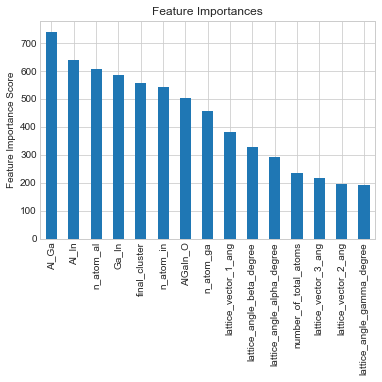

In [405]:
xgb_target1 = XGBRegressor(learning_rate=0.1,n_estimators=1000,max_depth=8,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27) 
xgb_target1_fit = modelfit(xgb_target1,dtrain,dtest,features,target1,useTrainCV=True)

In [398]:
xgb_target1_fit.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=56, nthread=4,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)>

In [406]:
param_test1 = {
    'max_depth': [5,6,7,8,9],
    'min_child_weight': [1,2,3,4,5,6],
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=60,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target1])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.00884, std: 0.00146, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: -0.00895, std: 0.00136, params: {'max_depth': 5, 'min_child_weight': 2},
  mean: -0.00909, std: 0.00137, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: -0.00883, std: 0.00131, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: -0.00903, std: 0.00119, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -0.00898, std: 0.00130, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: -0.00902, std: 0.00143, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: -0.00898, std: 0.00132, params: {'max_depth': 6, 'min_child_weight': 2},
  mean: -0.00891, std: 0.00129, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: -0.00896, std: 0.00132, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: -0.00900, std: 0.00126, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: -0.00877, std: 0.00124, params: {'max_depth': 6, 'min_child_weight': 6},
  mean: -0.00917, std: 0.001

In [326]:
param_test1 = {
   'gamma': [0,0.1,0.2,0.4,0.6,0.8]
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=75,max_depth=6,min_child_weight=6,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target1])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.00850, std: 0.00143, params: {'gamma': 0},
  mean: -0.00916, std: 0.00149, params: {'gamma': 0.1},
  mean: -0.00984, std: 0.00159, params: {'gamma': 0.2},
  mean: -0.01109, std: 0.00208, params: {'gamma': 0.4},
  mean: -0.01219, std: 0.00186, params: {'gamma': 0.6},
  mean: -0.01319, std: 0.00217, params: {'gamma': 0.8}],
 {'gamma': 0},
 -0.008500925795861307)

In [407]:
features = ['number_of_total_atoms','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree','Al_Ga','Al_In','AlGaIn_O','Ga_In','n_atom_al','n_atom_ga','n_atom_in','final_cluster']

In [409]:
param_test1 = {
   'subsample': [0.7,0.8,0.9,1],
    'colsample_bytree': [0.7,0.8,0.9,1]
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=60,max_depth=6,min_child_weight=6,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target1])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.00922, std: 0.00152, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: -0.00898, std: 0.00150, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: -0.00889, std: 0.00136, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: -0.00913, std: 0.00147, params: {'colsample_bytree': 0.7, 'subsample': 1},
  mean: -0.00888, std: 0.00115, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: -0.00877, std: 0.00124, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: -0.00882, std: 0.00096, params: {'colsample_bytree': 0.8, 'subsample': 0.9},
  mean: -0.00901, std: 0.00118, params: {'colsample_bytree': 0.8, 'subsample': 1},
  mean: -0.00887, std: 0.00125, params: {'colsample_bytree': 0.9, 'subsample': 0.7},
  mean: -0.00891, std: 0.00138, params: {'colsample_bytree': 0.9, 'subsample': 0.8},
  mean: -0.00894, std: 0.00139, params: {'colsample_bytree': 0.9, 'subsample': 0.9},
  mean: -0.00882, std: 0.00129, params: {'colsample_bytree': 0.9, 'su

In [332]:
param_test1 = {
 'reg_lambda':[1,1.33,1.66]
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=75,max_depth=7,min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,reg_alpha=0,reg_lambda=0.01,seed=27),param_grid=param_test1,scoring='mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target1])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.00850, std: 0.00143, params: {'reg_lambda': 1},
  mean: -0.00877, std: 0.00112, params: {'reg_lambda': 1.33},
  mean: -0.00876, std: 0.00126, params: {'reg_lambda': 1.66}],
 {'reg_lambda': 1},
 -0.008500925795861307)

In [353]:
features = 

['number_of_total_atoms',
 'lattice_vector_1_ang',
 'lattice_vector_2_ang',
 'lattice_vector_3_ang',
 'lattice_angle_alpha_degree',
 'lattice_angle_beta_degree',
 'lattice_angle_gamma_degree',
 'Al_Ga',
 'Al_In',
 'AlGaIn_O',
 'Ga_In',
 'n_atom_al',
 'n_atom_ga',
 'n_atom_in',
 't12',
 't33',
 't167',
 't194',
 't206',
 't227',
 'final_cluster']


Model Report
Accuracy train: 0.06093
Accuracy test : 0.1056


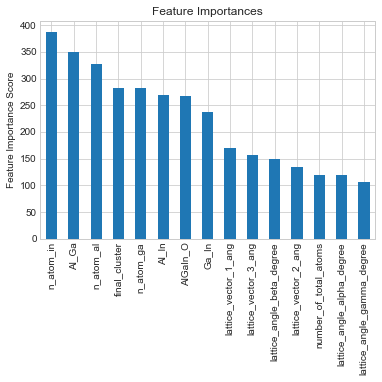

In [402]:
xgbRegressor_1 = XGBRegressor(learning_rate=0.1,n_estimators=75,max_depth=7,min_child_weight=3,gamma=0,subsample=0.6,colsample_bytree=0.7,objective='reg:linear',nthread=4,reg_alpha=0,reg_lambda=10,seed=27)
xgbFit1 = modelfit(xgbRegressor_1,dtrain,dtest,features,target1,useTrainCV=False,early_stopping_rounds=5)

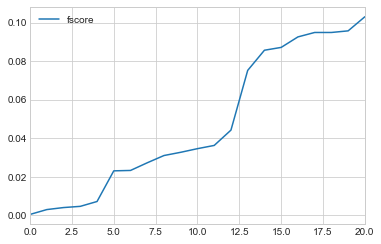

In [350]:

importance = xgbFit1.booster().get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()

In [ ]:
xgbFit1.booster().get_fscore

In [ ]:
xgbFit1.booster().get_fscore


Model Report
Accuracy train: 0.01808
Accuracy test : 0.03052


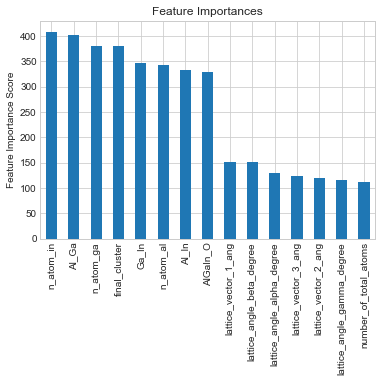

In [403]:
xgb_target2 = XGBRegressor(learning_rate=0.1,n_estimators=1000,max_depth=8,min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27) 
xgb_target2_fit = modelfit(xgb_target2,dtrain,dtest,features,target2,useTrainCV=True)

In [115]:
xgb_target2_fit.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=3, missing=None, n_estimators=53, nthread=4,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)>

In [114]:
param_test1 = {
    'max_depth': [7,8,9],
    'min_child_weight': [1,2,3,4],
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=55,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='neg_mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target2])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.00116, std: 0.00008, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: -0.00115, std: 0.00007, params: {'max_depth': 7, 'min_child_weight': 2},
  mean: -0.00116, std: 0.00009, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -0.00116, std: 0.00008, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: -0.00117, std: 0.00007, params: {'max_depth': 8, 'min_child_weight': 1},
  mean: -0.00117, std: 0.00009, params: {'max_depth': 8, 'min_child_weight': 2},
  mean: -0.00118, std: 0.00009, params: {'max_depth': 8, 'min_child_weight': 3},
  mean: -0.00116, std: 0.00007, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: -0.00121, std: 0.00009, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: -0.00119, std: 0.00009, params: {'max_depth': 9, 'min_child_weight': 2},
  mean: -0.00119, std: 0.00009, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: -0.00118, std: 0.00009, params: {'max_depth': 9, 'min_child_weight': 4}],
 {'max_depth': 7, 'min_chil

In [116]:
param_test1 = {
   'gamma': [0,0.1,0.2,0.4,0.6,0.8]
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=55,max_depth=7,min_child_weight=2,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='neg_mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target2])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.00115, std: 0.00007, params: {'gamma': 0},
  mean: -0.00190, std: 0.00011, params: {'gamma': 0.1},
  mean: -0.00245, std: 0.00015, params: {'gamma': 0.2},
  mean: -0.00316, std: 0.00022, params: {'gamma': 0.4},
  mean: -0.00377, std: 0.00027, params: {'gamma': 0.6},
  mean: -0.00430, std: 0.00028, params: {'gamma': 0.8}],
 {'gamma': 0},
 -0.001151150295404976)

In [121]:
param_test1 = {
   'subsample': [0.7,0.8,1],
    'colsample_bytree': [0.7,0.8]
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=55,max_depth=7,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='neg_mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target2])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.00117, std: 0.00009, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: -0.00118, std: 0.00009, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: -0.00121, std: 0.00010, params: {'colsample_bytree': 0.7, 'subsample': 1},
  mean: -0.00118, std: 0.00009, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: -0.00116, std: 0.00008, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: -0.00120, std: 0.00012, params: {'colsample_bytree': 0.8, 'subsample': 1}],
 {'colsample_bytree': 0.8, 'subsample': 0.8},
 -0.0011621105870536807)

In [126]:
param_test1 = {
 'reg_lambda':[0.0002,0.001]
}
gsearch1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1,n_estimators=55,max_depth=7,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,reg_alpha=0,reg_lambda=0.01,seed=27),param_grid=param_test1,scoring='neg_mean_squared_error',n_jobs=4,iid=False,cv=5)
gsearch1.fit(dtrain[features],dtrain[target2])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.00127, std: 0.00014, params: {'reg_lambda': 0.0002},
  mean: -0.00126, std: 0.00015, params: {'reg_lambda': 0.001}],
 {'reg_lambda': 0.001},
 -0.0012618686245579106)

In [336]:
xgbRegressor_2 = XGBRegressor(learning_rate=0.1,n_estimators=55,max_depth=7,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,reg_alpha=0,reg_lambda=0.001,seed=27)
xgbFit2 = modelfit(xgbRegressor_2,dtrain,dtest,features,target2,useTrainCV=False,early_stopping_rounds=100)


Model Report
Accuracy train: 0.01419
Accuracy test : 0.03184


AttributeError: 'XGBRegressor' object has no attribute 'get_fscore'


Model Report
Accuracy train: 0.02835
Accuracy test : 0.03013


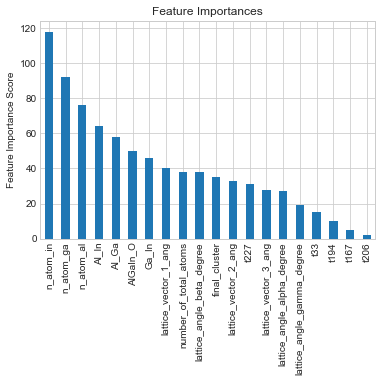

In [33]:
xgbRegressor_2 = XGBRegressor(learning_rate=0.1,n_estimators=60,max_depth=4,min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.9,objective='reg:linear',nthread=4,reg_alpha=0,reg_lambda=0.0001,seed=27)
xgbFit2 = modelfit(xgbRegressor_2,dtrain,dtest,features,target2,useTrainCV=False,early_stopping_rounds=100)

In [34]:
formation_prediction = np.exp(xgbFit2.predict(test[features]))-1

In [130]:
bandgap_prediction = np.exp(xgbFit1.predict(test[features]))-1

In [131]:
dtest_prediction = gsearch1.predict(dtest[features])
dtrain_prediction = gsearch1.predict(dtrain[features])
print(np.sqrt(mean_squared_error(dtest_prediction,dtest[target1])))
print(np.sqrt(mean_squared_error(dtrain_prediction,dtrain[target1])))


0.948895973243
0.982031499543


In [ ]:
xgb_target2 = XGBClassifier(learning_rate=0.1,n_estimators=1000,max_depth=8,min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',nthread=4,scale_pos_weight=1,seed=27) 
xgb_target1_fit = modelfit(xgb_target2,dtrain,dtest,features,target2,useTrainCV=True)

In [125]:
XGBRegressor?

In [95]:
xgb_target1_fit.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=3, missing=None, n_estimators=100, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)>

In [155]:
hamse_ho_jayega = test[['id']]
hamse_ho_jayega['bandgap_energy_ev'] = (test_predictions_band_linear+bandgap_prediction)/2
#hamse_ho_jayega['formation_energy_ev_natom'] = test_predictions_form_linear

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [159]:
#hamse_ho_jayega = test[['id']]
#hamse_ho_jayega['bandgap_energy_ev'] = bandgap_prediction
hamse_ho_jayega['formation_energy_ev_natom'] = (formation_prediction+test_predictions_form_linear)/2.01

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
tingting = test[['id']]
tingting['formation_prediction'] = formation_prediction
tingting.to_csv("formation_prediction.csv",index = False)

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [160]:
hamse_ho_jayega[hamse_ho_jayega['bandgap_energy_ev']<0]

,id,bandgap_energy_ev,formation_energy_ev_natom


In [161]:
hamse_ho_jayega.to_csv("hamse_ho_jayega.csv",index=False)

In [75]:
test_predictions_form_linear[test_predictions_form_linear<0]

TypeError: '<' not supported between instances of 'list' and 'int'

TypeError: '<' not supported between instances of 'list' and 'int'